## 1. Khớp xâu: Tìm các vị trí xuất hiện của xâu mẫu P trong văn bản T cho trước.

In [39]:
import random


# brute force algorithm
def brute_force_match(T, P):
    n, m = len(T), len(P)
    positions = []
    for i in range(n - m + 1):
        if T[i:i + m] == P:  # So sánh từng đoạn con với P
            positions.append(i)
    return positions


def backtrack_match(T, P):
    def search(i, j):
        if j == len(P):  # Nếu khớp toàn bộ P
            positions.append(i - j)
            search(i - j + 1, 0)  # Tiếp tục tìm kiếm sau khi tìm thấy

        elif i < len(T):  # Nếu chưa duyệt hết T
            if T[i] == P[j]:  # Nếu ký tự khớp
                search(i + 1, j + 1)
            else:  # Nếu không khớp
                search(i - j + 1, 0)

    positions = []
    search(0, 0)
    return positions


# Tạo văn bản và xâu mẫu
T = "".join(random.choices("ACGT", k=100))
P = "ACG"

print(f"Văn bản: {T}")
print(f"Xâu mẫu: {P}")

positions_bf = brute_force_match(T, P)
positions_bt = backtrack_match(T, P)

print(f"Brute Force: {positions_bf}")
print(f"Backtracking: {positions_bt}")

Văn bản: TGGTTCCCTACAACGGGTGTACCGTCCTCACGTCGGGGTCCCTCGACGTATTTGACCTGGGCTGGAATAAGTAACTAACGGCGCGCTGTGGTTTCAGGCA
Xâu mẫu: ACG
Brute Force: [12, 29, 45, 77]
Backtracking: [12, 29, 45, 77]


## 2. Dãy nhị phân: Liệt kê các dãy nhị phân có độ dài n.

In [40]:
def generate_binary_brute_force(n):
    for i in range(2 ** n):
        print(format(i, f'0{n}b'), end=" ")


def generate_binary_backtracking(n, prefix=""):
    if len(prefix) == n:
        print(prefix, end=" ")
        return
    generate_binary_backtracking(n, prefix + "0")
    generate_binary_backtracking(n, prefix + "1")


generate_binary_brute_force(4)
print()
generate_binary_backtracking(4)

0000 0001 0010 0011 0100 0101 0110 0111 1000 1001 1010 1011 1100 1101 1110 1111 
0000 0001 0010 0011 0100 0101 0110 0111 1000 1001 1010 1011 1100 1101 1110 1111 

## 3. Đường đi trong mê cung: Tìm đường đi từ A đến B trong mê cung.

In [41]:
def backtracking_maze_solver(maze, start, end):
    paths = []
    n, m = len(maze), len(maze[0])
    visited = [[False] * m for _ in range(n)]

    def search(x, y, path):
        if not (0 <= x < n and 0 <= y < m) or maze[x][y] == 0 or visited[x][y]:
            return

        if (x, y) == end:
            paths.append(path[:])
            return

        visited[x][y] = True

        for dx, dy in [(1, 0), (0, 1), (-1, 0), (0, -1)]:
            nx, ny = x + dx, y + dy
            search(nx, ny, path + [(nx, ny)])

        visited[x][y] = False

    search(*start, [start])
    return paths


maze = [
    [1, 1, 0, 1, 1],
    [0, 1, 1, 1, 0],
    [1, 0, 0, 1, 1],
    [1, 1, 1, 0, 1],
    [0, 0, 1, 1, 1]
]

start = (0, 0)
end = (4, 4)

paths = backtracking_maze_solver(maze, start, end)
for path in paths:
    print(path)


[(0, 0), (0, 1), (1, 1), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 4)]


## 4. Bài toán xếp hậu: Cho một bàn cờ vua có kích thước n × n. Biết rằng, một quân hậu trên bàn cờ có thể ăn được các quân khác tại các ô cùng hàng, cùng cột hoặc cùng đường chéo. Tìm cách xếp n quân hậu trên bàn cờ sao cho không quân hậu nào ăn quân hậu nào.

In [42]:
def backtracking_n_queens(n):
    solutions = []
    board = [-1] * n

    col_used = [False] * n
    diag1_used = [False] * (2 * n - 1)
    diag2_used = [False] * (2 * n - 1)

    def solve(row):
        if row == n:
            solutions.append(board[:])
            return

        for col in range(n):
            diag1 = row - col + n - 1
            diag2 = row + col

            if not col_used[col] and not diag1_used[diag1] and not diag2_used[diag2]:
                board[row] = col
                col_used[col] = diag1_used[diag1] = diag2_used[diag2] = True

                solve(row + 1)

                col_used[col] = diag1_used[diag1] = diag2_used[diag2] = False

    solve(0)
    return solutions


n = 4  # Kích thước bàn cờ
solutions = backtracking_n_queens(n)  #
for solution in solutions:
    print(solution)


[1, 3, 0, 2]
[2, 0, 3, 1]


## 5. Bài toán mã đi tuần: Cho bàn cờ vua có kích thước n × n. Một quân mã được phép di chuyển theo luật cờ vua, biết rằng đầu tiên quân mã được đặt ở ô (x0, y0). Hãy chỉ ra hành trình (nếu có) của quân mã để quân mã đi qua các ô trên bàn cờ vua, mỗi ô đi qua đúng 1 lần.

 0 59 38 33 30 17  8 63
37 34 31 60  9 62 29 16
58  1 36 39 32 27 18  7
35 48 41 26 61 10 15 28
42 57  2 49 40 23  6 19
47 50 45 54 25 20 11 14
56 43 52  3 22 13 24  5
51 46 55 44 53  4 21 12


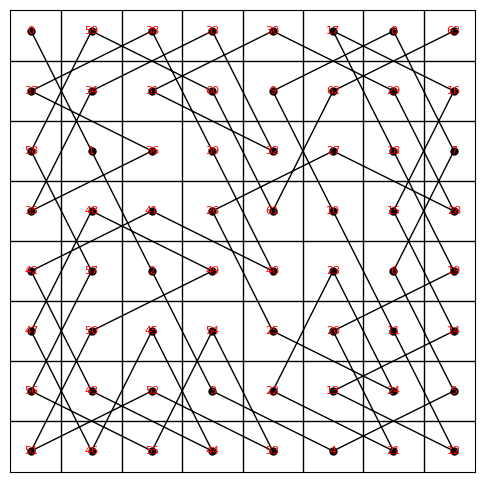

In [43]:
import numpy as np
from matplotlib import pyplot as plt

def brute_force_knight_tour(n, x0, y0):
    board = [[-1] * n for _ in range(n)]
    moves = [(2, 1), (1, 2), (-1, 2), (-2, 1), (-2, -1), (-1, -2), (1, -2), (2, -1)]

    def is_valid(x, y):
        return 0 <= x < n and 0 <= y < n and board[x][y] == -1

    def solve(x, y, movei):
        if movei == n * n:
            return True

        for dx, dy in moves:
            nx, ny = x + dx, y + dy
            if is_valid(nx, ny):
                board[nx][ny] = movei
                if solve(nx, ny, movei + 1):
                    return True
                board[nx][ny] = -1

        return False

    board[x0][y0] = 0
    if solve(x0, y0, 1):
        return board
    return None


def draw_knight_tour(board):
    n = len(board)
    fig, ax = plt.subplots(figsize=(6, 6))

    ax.set_xticks(np.arange(n + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(n + 1) - 0.5, minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=1)
    ax.tick_params(which="both", bottom=False, left=False, labelbottom=False, labelleft=False)

    positions = sorted(((i, j, board[i][j]) for i in range(n) for j in range(n)), key=lambda x: x[2])
    x_vals, y_vals = zip(*[(j, n - 1 - i) for i, j, _ in positions])

    ax.plot(x_vals, y_vals, 'k-', marker='o', markersize=5, linewidth=1)

    for i, j, step in positions:
        ax.text(j, n - 1 - i, str(step), ha='center', va='center', fontsize=8, color='red')

    plt.show()


# Chạy thuật toán với n = 8
n = 8
solution = brute_force_knight_tour(n, 0, 0)

if solution:
    for row in solution:
        print(" ".join(f"{cell:2}" for cell in row))
    draw_knight_tour(solution)
else:
    print("Không có hành trình hợp lệ!")

## 6. Phân tích số: Cho số nguyên dương n. Hãy liệt kê tất cả các cách phân tích số n thành các số nguyên dương nhỏ hơn nó.

In [44]:
def partition_number(n):
    result = []

    def backtrack(target, start, path):
        if target == 0:
            result.append(path[:])
            return
        for i in range(start, 0, -1):  # Giảm dần để tránh lặp
            if i <= target:
                backtrack(target - i, i, path + [i])

    backtrack(n, n - 1, [])
    return result

n = 9
partitions = partition_number(n)

for p in partitions:
    print(p)


[8, 1]
[7, 2]
[7, 1, 1]
[6, 3]
[6, 2, 1]
[6, 1, 1, 1]
[5, 4]
[5, 3, 1]
[5, 2, 2]
[5, 2, 1, 1]
[5, 1, 1, 1, 1]
[4, 4, 1]
[4, 3, 2]
[4, 3, 1, 1]
[4, 2, 2, 1]
[4, 2, 1, 1, 1]
[4, 1, 1, 1, 1, 1]
[3, 3, 3]
[3, 3, 2, 1]
[3, 3, 1, 1, 1]
[3, 2, 2, 2]
[3, 2, 2, 1, 1]
[3, 2, 1, 1, 1, 1]
[3, 1, 1, 1, 1, 1, 1]
[2, 2, 2, 2, 1]
[2, 2, 2, 1, 1, 1]
[2, 2, 1, 1, 1, 1, 1]
[2, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1]


## 7. Sudoku: Có một hình vuông được chia thành 9 × 9 ô vuông con. Mỗi ô vuông con có giá trị trong khoảng từ 1 đến 9. Cho trước hình vuông với một số ô vuông con có các giá trị cho trước, các ô vuông còn lại trống. Hãy điền các số từ 1 đến 9 vào các ô con sao cho: hàng ngang, hàng dọc là các số khác nhau từ 1 đến 9, mỗi khối 3 × 3 là các số khác nhau từ 1 đến 9. Nếu bài toán không có lời giải, hãy đưa ra thông báo.

In [45]:
def is_valid(board, row, col, num):
    """Kiểm tra số num có thể đặt vào ô (row, col) không"""
    for i in range(9):
        if board[row][i] == num or board[i][col] == num:
            return False

    start_row, start_col = (row // 3) * 3, (col // 3) * 3
    for i in range(3):
        for j in range(3):
            if board[start_row + i][start_col + j] == num:
                return False

    return True

def solve_sudoku(board):
    """Thuật toán brute force giải Sudoku"""
    for row in range(9):
        for col in range(9):
            if board[row][col] == 0:
                for num in range(1, 10):
                    if is_valid(board, row, col, num):
                        board[row][col] = num
                        if solve_sudoku(board):
                            return True
                        board[row][col] = 0
                return False
    return True  # Đã điền xong

def print_board(board):
    for row in board:
        print(" ".join(str(num) if num != 0 else "." for num in row))

# 0 là ô trống
sudoku_board = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]

if solve_sudoku(sudoku_board):
    print_board(sudoku_board)
else:
    print("Không có lời giải hợp lệ!")


5 3 4 6 7 8 9 1 2
6 7 2 1 9 5 3 4 8
1 9 8 3 4 2 5 6 7
8 5 9 7 6 1 4 2 3
4 2 6 8 5 3 7 9 1
7 1 3 9 2 4 8 5 6
9 6 1 5 3 7 2 8 4
2 8 7 4 1 9 6 3 5
3 4 5 2 8 6 1 7 9


## Leo bậc thang: Bạn cần leo lên một cầu thang có n bậc. Trong mỗi bước bạn có thể leo tối đa k bậc. Hãy chỉ ra tất cả các cách có thể có để leo được lên bậc cầu thang đó.
Ví dụ:
Đầu vào: n = 4 và k = 2

In [46]:
def backtracking_climb_stairs(n, k):
    result = []

    def backtrack(path, remaining):
        if remaining == 0:
            result.append(path[:])
            return
        for step in range(1, k + 1):
            if remaining >= step:
                backtrack(path + [step], remaining - step)

    backtrack([], n)
    return result

n, k = 4, 2
ways = backtracking_climb_stairs(n, k)
for way in ways:
    print(way)


[1, 1, 1, 1]
[1, 1, 2]
[1, 2, 1]
[2, 1, 1]
[2, 2]


## 9. Bài toán phân công công việc.

In [47]:
def backtracking_assignment(cost_matrix):
    n = len(cost_matrix)
    visited = [False] * n
    min_cost = [float('inf')]

    def assign(worker, current_cost):
        if worker == n:  # Tất cả công việc đã được gán
            min_cost[0] = min(min_cost[0], current_cost)
            return

        if current_cost >= min_cost[0]:  # Nhánh cắt bỏ (tối ưu)
            return

        for job in range(n):
            if not visited[job]:
                visited[job] = True
                assign(worker + 1, current_cost + cost_matrix[worker][job])
                visited[job] = False

    assign(0, 0)
    return min_cost[0]

cost_matrix = [
    [9, 2, 7, 8],
    [6, 4, 3, 7],
    [5, 8, 1, 8],
    [7, 6, 9, 4]
]

print("Chi phí tối thiểu:", backtracking_assignment(cost_matrix))


Chi phí tối thiểu: 13


## Bài toán người bán hàng: Một người bán hàng muốn giao hàng đến n thành phố T1, T2, T3, ..., Tn. Người bán hàng xuất phát từ một thành phố bất kỳ nào đó và muốn đi qua tất cả các thành phố còn lại. Mỗi thành phố đi qua đúng 1 lần rồi quay trở lại thành phố xuất phát ban đầu. Gọi cij là chi phí đi từ thành phố Ti đến thành phố Tj. Hãy tìm một lộ trình thỏa mãn yêu cầu của bài toán sao cho tổng chi phí là nhỏ nhất.

In [48]:
import sys

def tsp_backtracking(cost_matrix):
    n = len(cost_matrix)
    min_cost = [sys.maxsize]
    path = [-1] * n
    visited = [False] * n

    def search(i, current_cost):
        if i == n:
            total_cost = current_cost + cost_matrix[path[n - 1]][path[0]]  # Quay về điểm đầu
            min_cost[0] = min(min_cost[0], total_cost)
            return

        if current_cost >= min_cost[0]:  # Nhánh cắt bỏ
            return

        for j in range(1, n):  # Bắt đầu từ thành phố 1 (giữ 0 cố định)
            if not visited[j]:
                path[i] = j
                visited[j] = True
                search(i + 1, current_cost + cost_matrix[path[i - 1]][j])
                visited[j] = False

    path[0] = 0
    visited[0] = True
    search(1, 0)
    return min_cost[0]

# Test
cost_matrix = [
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
]

print("Chi phí nhỏ nhất:", tsp_backtracking(cost_matrix))


Chi phí nhỏ nhất: 80


## 11. Bài toán cái túi: Có n loại đồ vật, mỗi loại có số lượng không hạn chế. Đồ vật loại i có trọng lượng là wi và có giá trị là vi , i ∈ {1, 2, ..., n}. Tìm cách chọn đồ vật để đặt vào cái túi có giới hạn trọng lượng là M sao cho tổng giá trị của các đồ vật được chọn là lớn nhất.

In [49]:
def knapsack(i, n, m, w, v, weight, sum_value, f):
    """
    i         : int   - Chỉ số của vật phẩm đang xét.
    n         : int   - Số lượng vật phẩm.
    m         : int   - Giới hạn trọng lượng của túi.
    w         : list  - Danh sách trọng lượng của từng vật phẩm.
    v         : list  - Danh sách giá trị của từng vật phẩm.
    weight    : int   - Tổng trọng lượng hiện tại của các vật đã chọn.
    sum_value : int   - Tổng giá trị hiện tại của các vật đã chọn.
    f         : list  - Danh sách chứa giá trị lớn nhất tìm được.
    """
    for j in range((m - weight) // w[i], -1, -1):
        xi = j
        weight += w[i] * xi
        sum_value += v[i] * xi

        if i == n - 1 or m - weight <= 0:
            if sum_value > f[0]:
                f[0] = sum_value
        else:
            g = sum_value + v[i + 1] * (m - weight) // w[i + 1]
            if g > f[0]:
                knapsack(i + 1, n, m, w, v, weight, sum_value, f)

        weight -= w[i] * xi
        sum_value -= v[i] * xi


n = 3
m = 5
w = [2, 8, 4]
v = [3, 4, 5]

f = [0]
knapsack(0, n, m, w, v, 0, 0, f)
print("Giá trị lớn nhất có thể đạt được:", f[0])


Giá trị lớn nhất có thể đạt được: 6
